## Looking at the different winds, both zonal and meridional at 10m

In [40]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.ticker as mticker
from matplotlib.colors import TwoSlopeNorm
import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature

### ZONAL

In [2]:
ds_u10_59 = xr.open_dataset('/nird/datalake/NS1004K/elihho/slo0059_echam6_BOT_mm_0_1850_var165.nc')
ds_u10_04 = xr.open_dataset('/nird/datalake/NS1004K/elihho/tes0004_echam6_BOT_mm_0_1850_var165.nc')
ds_u10_59

<xarray.Dataset> Size: 2GB
Dimensions:  (time: 22200, lon: 192, lat: 96)
Coordinates:
  * time     (time) float64 178kB 7.001e+07 7.001e+07 ... 8.85e+07 8.85e+07
  * lon      (lon) float64 2kB 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
  * lat      (lat) float64 768B 88.57 86.72 84.86 83.0 ... -84.86 -86.72 -88.57
Data variables:
    var165   (time, lat, lon) float32 2GB ...
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Thu Jan 02 17:49:04 2020: cdo cat slo0059__echam6_BOT_mm_70...
    institution:  Max-Planck-Institute for Meteorology
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

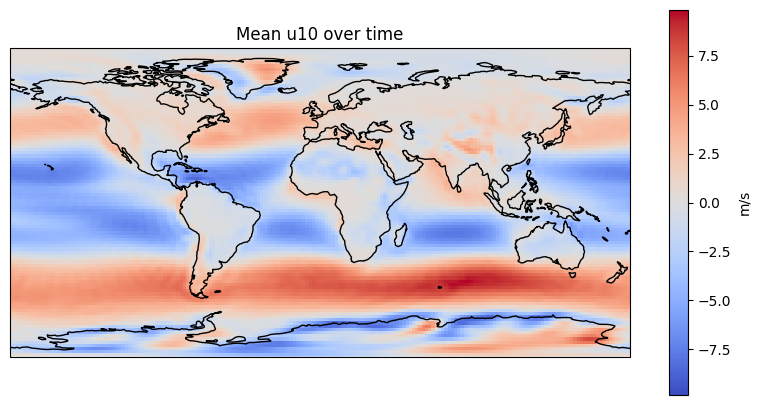

In [3]:
fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())

# Select a time slice
data = ds_u10_59['var165'].mean(dim='time')

# Plot
data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', cbar_kwargs={'label': 'm/s'})
ax.coastlines()
ax.set_title('Mean u10 over time')
plt.show()

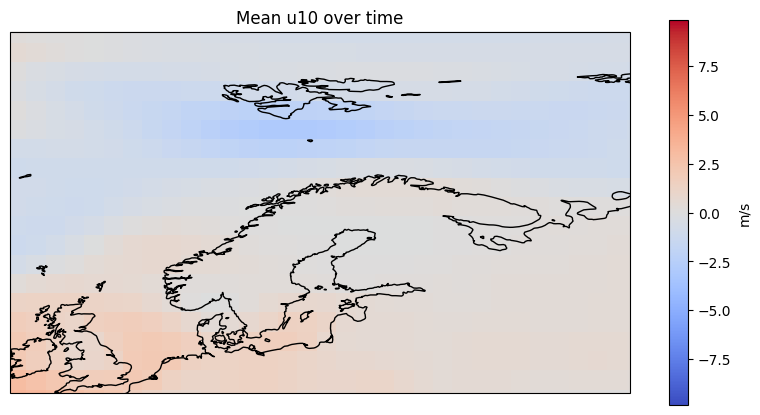

In [4]:
fig = plt.figure(figsize=(10, 5))

# Create the axes with the PlateCarree projection
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Set the map extent to Scandinavia
ax.set_extent([-10, 50, 50, 85], crs=ccrs.PlateCarree())

# Select and average data
data = ds_u10_59['var165'].mean(dim='time')

# Plot
data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', cbar_kwargs={'label': 'm/s'})
ax.coastlines()
ax.set_title('Mean u10 over time')

plt.show()

In [5]:
last_date_num = 88501231
first_date_num = 70010131

total_days_num = last_date_num - first_date_num  # ~ 18491100

total_years = 1850  # from 0 to 1850

# Calculate how many "numeric units" per year
units_per_year = total_days_num / total_years  # ~ 9995 units/year

def year_to_numeric(year):
    return first_date_num + year * units_per_year

In [6]:
Samalas=year_to_numeric(1257)
var59 = ds_u10_59['var165']
var04 = ds_u10_04['var165']

st_59 = var59.sel(time=Samalas, method='nearest')
st_04=var04.sel(time=Samalas, method='nearest')

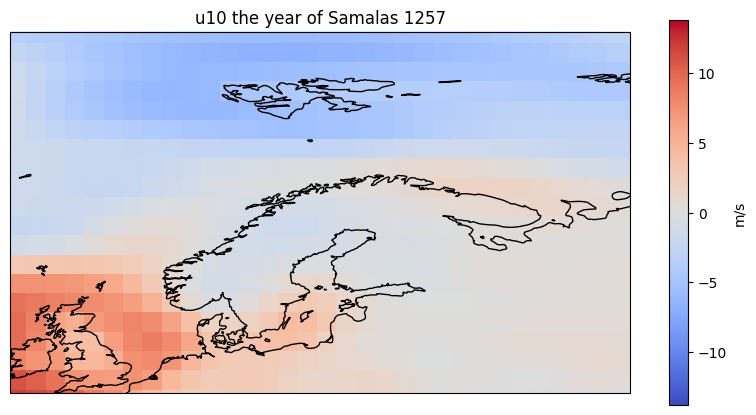

In [7]:
fig = plt.figure(figsize=(10, 5))

# Create the axes with the PlateCarree projection
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Set the map extent to Scandinavia
ax.set_extent([-10, 50, 50, 85], crs=ccrs.PlateCarree())

# Plot
st_59.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', cbar_kwargs={'label': 'm/s'})
ax.coastlines()
ax.set_title('u10 the year of Samalas 1257')

plt.show()

In [8]:
pre_samalas =[year_to_numeric(1226), year_to_numeric(1256)]
var59 = ds_u10_59['var165']
var04 = ds_u10_04['var165']

selected_59 = var59.sel(time=pre_samalas, method='nearest')
avg_59 = selected_59.mean(dim='time')

selected_04 = var04.sel(time=pre_samalas, method='nearest')
avg_04 = selected_04.mean(dim='time')

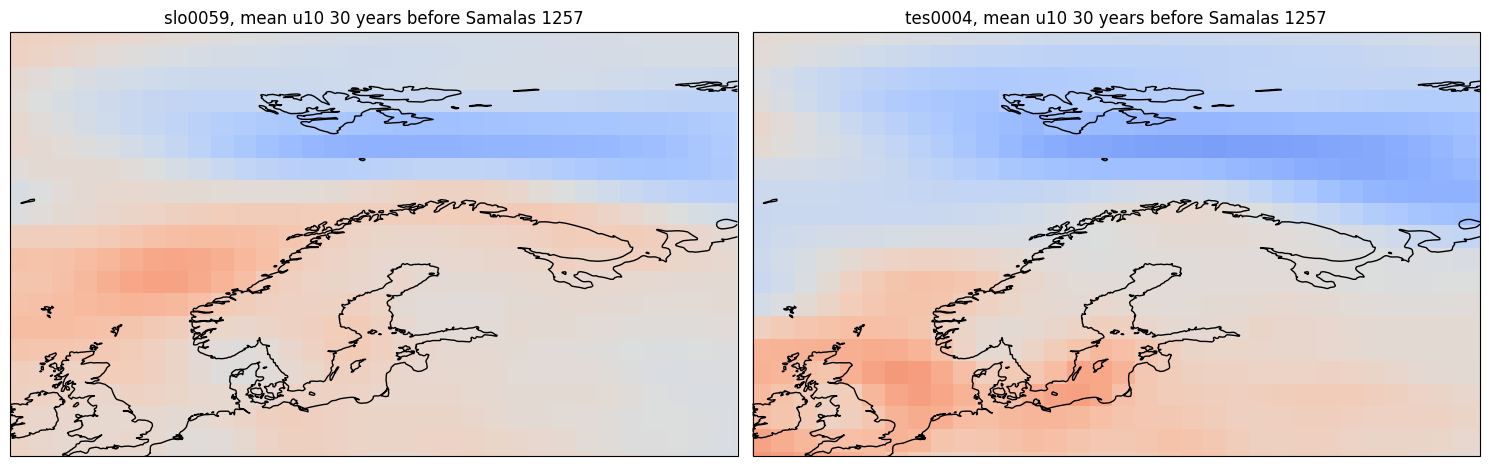

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Set extent and plot on first subplot
ax[0].set_extent([-10, 50, 50, 85], crs=ccrs.PlateCarree())
avg_59.plot(ax=ax[0], transform=ccrs.PlateCarree(), cmap='coolwarm', add_colorbar=False)
ax[0].coastlines()
ax[0].set_title('slo0059, mean u10 30 years before Samalas 1257')

# Set extent and plot on second subplot
ax[1].set_extent([-10, 50, 50, 85], crs=ccrs.PlateCarree())
avg_04.plot(ax=ax[1], transform=ccrs.PlateCarree(), cmap='coolwarm', add_colorbar=False)
ax[1].coastlines()
ax[1].set_title('tes0004, mean u10 30 years before Samalas 1257')

plt.tight_layout()
plt.show()

In [10]:
samalas_59=var59.sel(time=year_to_numeric(1257), method='nearest')
samalas_04=var04.sel(time=year_to_numeric(1257), method='nearest')

anom_59 = samalas_59 - avg_59
anom_04 = samalas_04 - avg_04

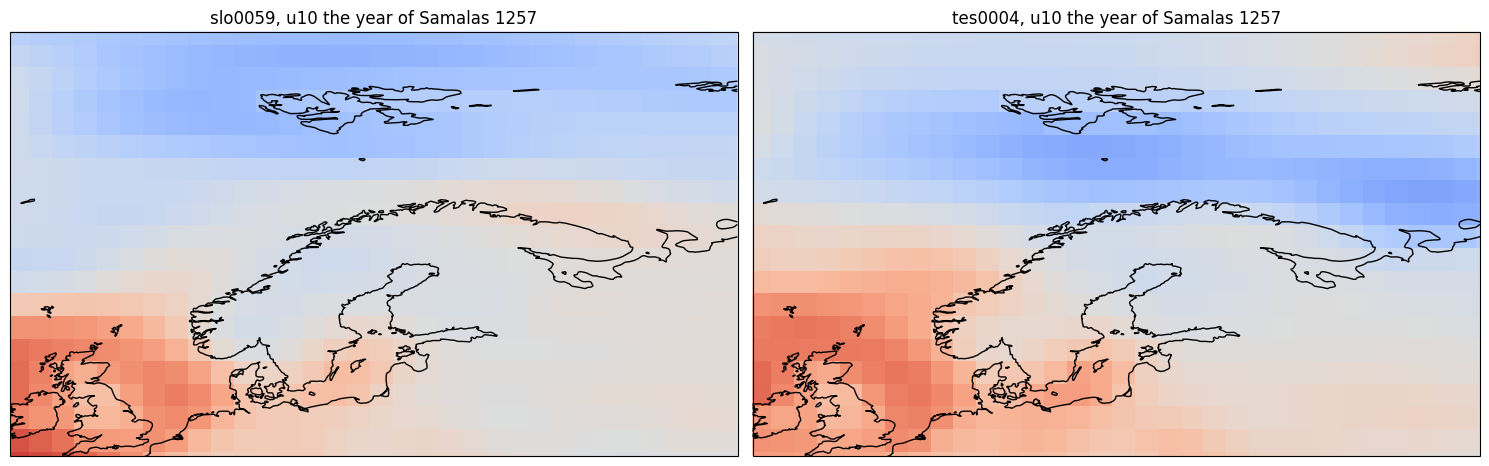

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Set extent and plot on first subplot
ax[0].set_extent([-10, 50, 50, 85], crs=ccrs.PlateCarree())
samalas_59.plot(ax=ax[0], transform=ccrs.PlateCarree(), cmap='coolwarm', add_colorbar=False)
ax[0].coastlines()
ax[0].set_title('slo0059, u10 the year of Samalas 1257')

# Set extent and plot on second subplot
ax[1].set_extent([-10, 50, 50, 85], crs=ccrs.PlateCarree())
samalas_04.plot(ax=ax[1], transform=ccrs.PlateCarree(), cmap='coolwarm', add_colorbar=False)
ax[1].coastlines()
ax[1].set_title('tes0004, u10 the year of Samalas 1257')

plt.tight_layout()
plt.show()

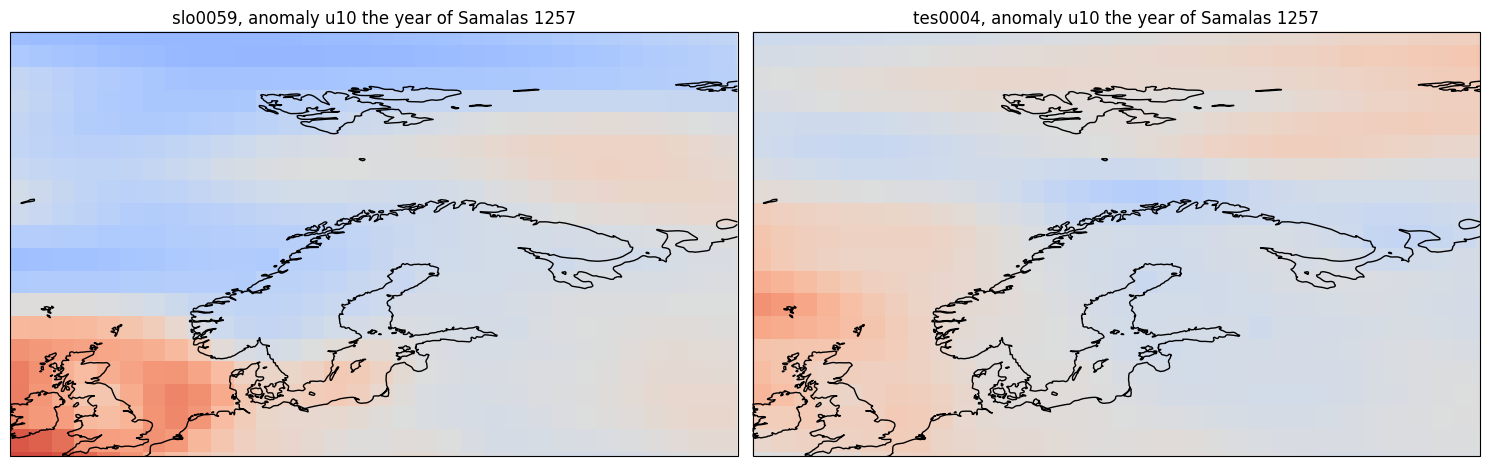

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Set extent and plot on first subplot
ax[0].set_extent([-10, 50, 50, 85], crs=ccrs.PlateCarree())
anom_59.plot(ax=ax[0], transform=ccrs.PlateCarree(), cmap='coolwarm', add_colorbar=False)
ax[0].coastlines()
ax[0].set_title('slo0059, anomaly u10 the year of Samalas 1257')

# Set extent and plot on second subplot
ax[1].set_extent([-10, 50, 50, 85], crs=ccrs.PlateCarree())
anom_04.plot(ax=ax[1], transform=ccrs.PlateCarree(), cmap='coolwarm', add_colorbar=False)
ax[1].coastlines()
ax[1].set_title('tes0004, anomaly u10 the year of Samalas 1257')

plt.tight_layout()
plt.show()

In [13]:
samalas_59=var59.sel(time=year_to_numeric(1258), method='nearest')
samalas_04=var04.sel(time=year_to_numeric(1258), method='nearest')

anom_59 = samalas_59 - avg_59
anom_04 = samalas_04 - avg_04

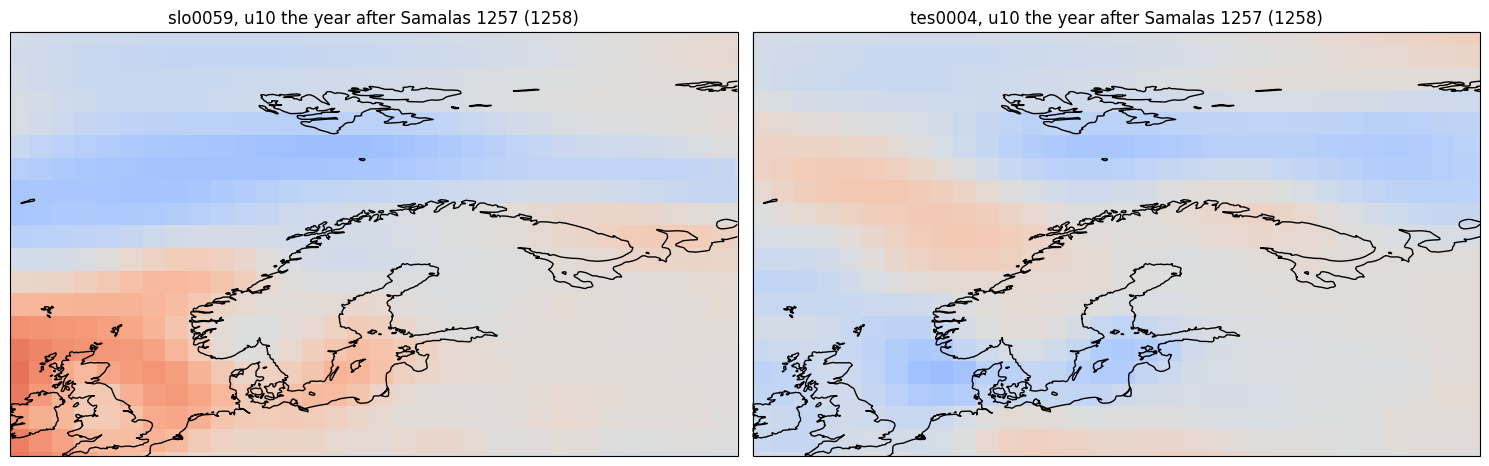

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Set extent and plot on first subplot
ax[0].set_extent([-10, 50, 50, 85], crs=ccrs.PlateCarree())
samalas_59.plot(ax=ax[0], transform=ccrs.PlateCarree(), cmap='coolwarm', add_colorbar=False)
ax[0].coastlines()
ax[0].set_title('slo0059, u10 the year after Samalas 1257 (1258)')

# Set extent and plot on second subplot
ax[1].set_extent([-10, 50, 50, 85], crs=ccrs.PlateCarree())
samalas_04.plot(ax=ax[1], transform=ccrs.PlateCarree(), cmap='coolwarm', add_colorbar=False)
ax[1].coastlines()
ax[1].set_title('tes0004, u10 the year after Samalas 1257 (1258)')

plt.tight_layout()
plt.show()

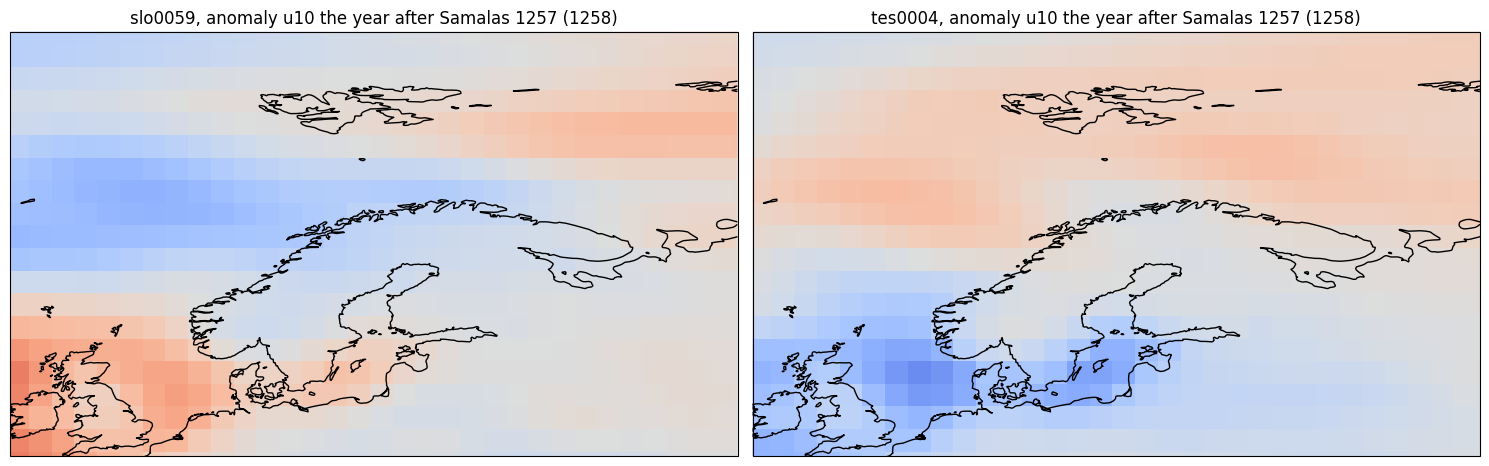

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Set extent and plot on first subplot
ax[0].set_extent([-10, 50, 50, 85], crs=ccrs.PlateCarree())
anom_59.plot(ax=ax[0], transform=ccrs.PlateCarree(), cmap='coolwarm', add_colorbar=False)
ax[0].coastlines()
ax[0].set_title('slo0059, anomaly u10 the year after Samalas 1257 (1258)')

# Set extent and plot on second subplot
ax[1].set_extent([-10, 50, 50, 85], crs=ccrs.PlateCarree())
anom_04.plot(ax=ax[1], transform=ccrs.PlateCarree(), cmap='coolwarm', add_colorbar=False)
ax[1].coastlines()
ax[1].set_title('tes0004, anomaly u10 the year after Samalas 1257 (1258)')

plt.tight_layout()
plt.show()

In [16]:
samalas_59=var59.sel(time=year_to_numeric(1259), method='nearest')
samalas_04=var04.sel(time=year_to_numeric(1259), method='nearest')

anom_59 = samalas_59 - avg_59
anom_04 = samalas_04 - avg_04

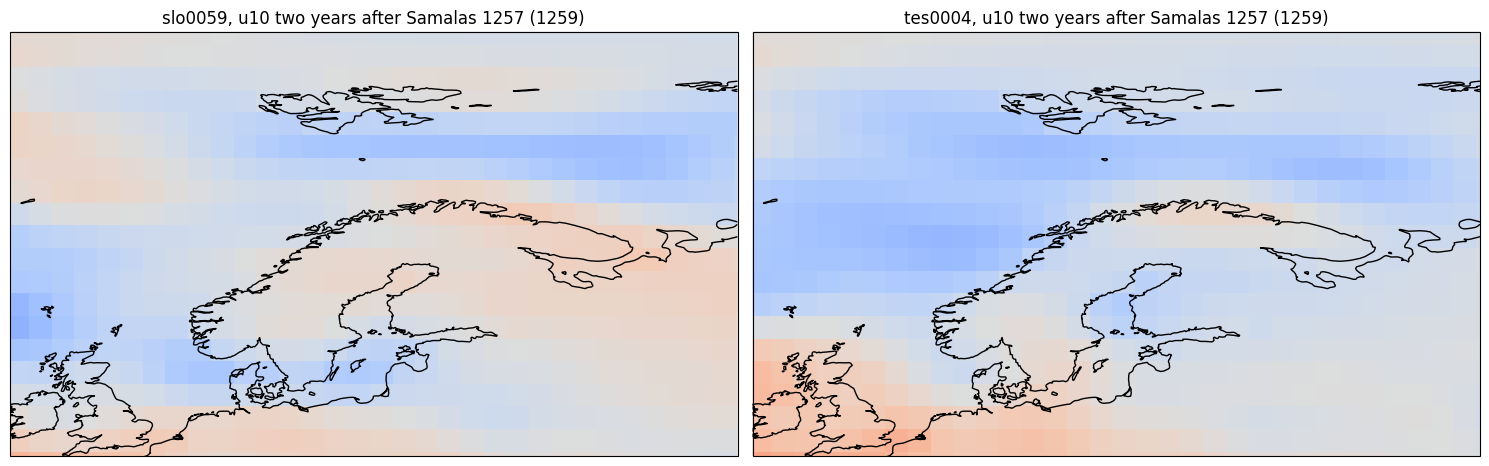

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Set extent and plot on first subplot
ax[0].set_extent([-10, 50, 50, 85], crs=ccrs.PlateCarree())
samalas_59.plot(ax=ax[0], transform=ccrs.PlateCarree(), cmap='coolwarm', add_colorbar=False)
ax[0].coastlines()
ax[0].set_title('slo0059, u10 two years after Samalas 1257 (1259)')

# Set extent and plot on second subplot
ax[1].set_extent([-10, 50, 50, 85], crs=ccrs.PlateCarree())
samalas_04.plot(ax=ax[1], transform=ccrs.PlateCarree(), cmap='coolwarm', add_colorbar=False)
ax[1].coastlines()
ax[1].set_title('tes0004, u10 two years after Samalas 1257 (1259)')

plt.tight_layout()
plt.show()

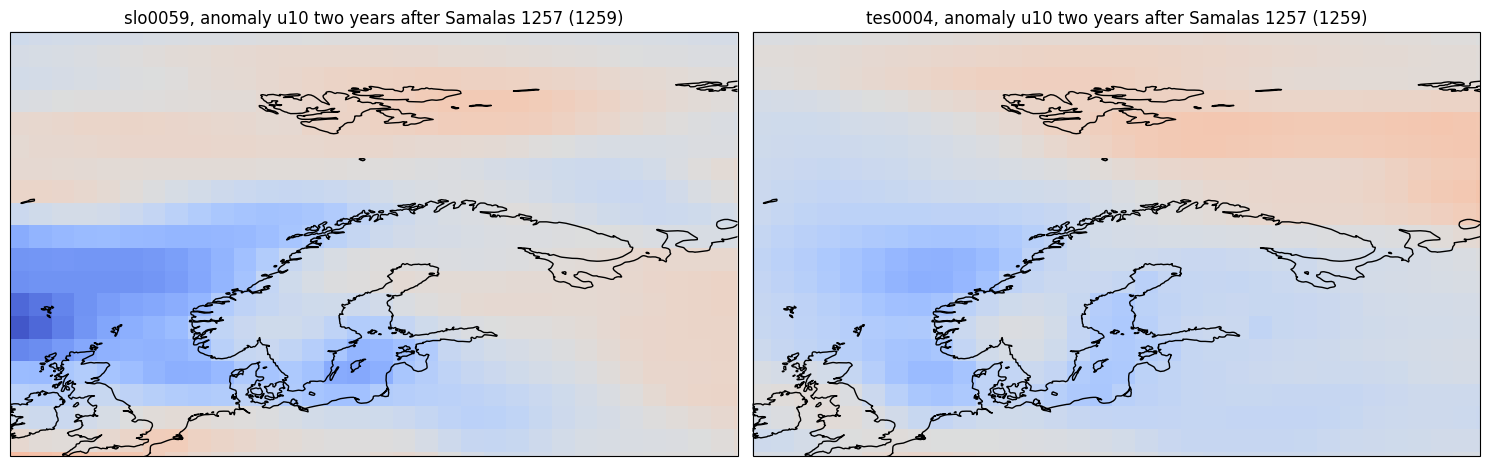

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Set extent and plot on first subplot
ax[0].set_extent([-10, 50, 50, 85], crs=ccrs.PlateCarree())
anom_59.plot(ax=ax[0], transform=ccrs.PlateCarree(), cmap='coolwarm', add_colorbar=False)
ax[0].coastlines()
ax[0].set_title('slo0059, anomaly u10 two years after Samalas 1257 (1259)')

# Set extent and plot on second subplot
ax[1].set_extent([-10, 50, 50, 85], crs=ccrs.PlateCarree())
anom_04.plot(ax=ax[1], transform=ccrs.PlateCarree(), cmap='coolwarm', add_colorbar=False)
ax[1].coastlines()
ax[1].set_title('tes0004, anomaly u10 two years after Samalas 1257 (1259)')

plt.tight_layout()
plt.show()

In [19]:
samalas_59=var59.sel(time=year_to_numeric(1260), method='nearest')
samalas_04=var04.sel(time=year_to_numeric(1260), method='nearest')

anom_59 = samalas_59 - avg_59
anom_04 = samalas_04 - avg_04

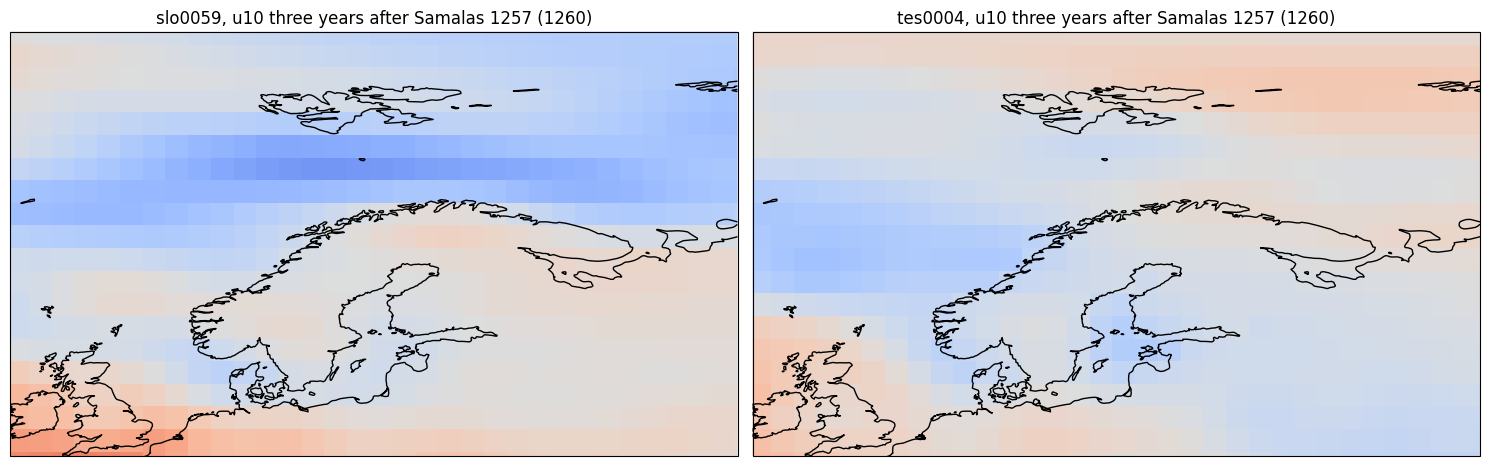

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Set extent and plot on first subplot
ax[0].set_extent([-10, 50, 50, 85], crs=ccrs.PlateCarree())
samalas_59.plot(ax=ax[0], transform=ccrs.PlateCarree(), cmap='coolwarm', add_colorbar=False)
ax[0].coastlines()
ax[0].set_title('slo0059, u10 three years after Samalas 1257 (1260)')

# Set extent and plot on second subplot
ax[1].set_extent([-10, 50, 50, 85], crs=ccrs.PlateCarree())
samalas_04.plot(ax=ax[1], transform=ccrs.PlateCarree(), cmap='coolwarm', add_colorbar=False)
ax[1].coastlines()
ax[1].set_title('tes0004, u10 three years after Samalas 1257 (1260)')

plt.tight_layout()
plt.show()

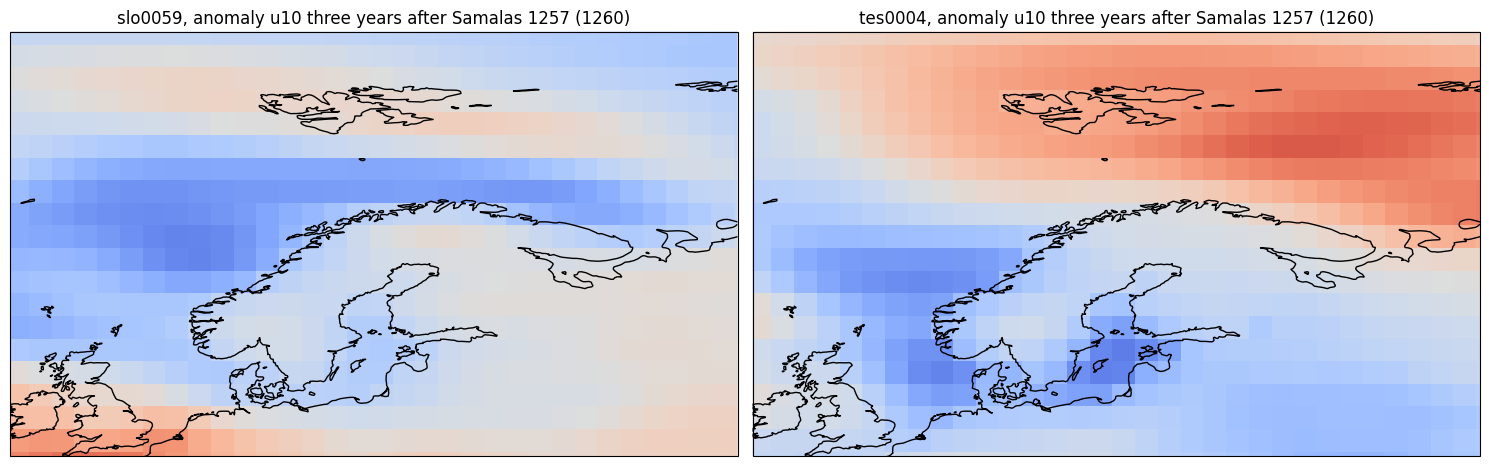

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Set extent and plot on first subplot
ax[0].set_extent([-10, 50, 50, 85], crs=ccrs.PlateCarree())
anom_59.plot(ax=ax[0], transform=ccrs.PlateCarree(), cmap='coolwarm', add_colorbar=False)
ax[0].coastlines()
ax[0].set_title('slo0059, anomaly u10 three years after Samalas 1257 (1260)')

# Set extent and plot on second subplot
ax[1].set_extent([-10, 50, 50, 85], crs=ccrs.PlateCarree())
anom_04.plot(ax=ax[1], transform=ccrs.PlateCarree(), cmap='coolwarm', add_colorbar=False)
ax[1].coastlines()
ax[1].set_title('tes0004, anomaly u10 three years after Samalas 1257 (1260)')

plt.tight_layout()
plt.show()

Looking at the absolute values to see changes in strength

In [22]:
absolute_u10_59 = abs(ds_u10_59['var165'])
absolute_u10_04 = abs(ds_u10_04['var165'])

In [23]:
ts_59 = absolute_u10_59.mean(dim=['lat', 'lon'])
ts_04 = absolute_u10_04.mean(dim=['lat', 'lon'])

In [24]:
last_date_num = 88501231
first_date_num = 70010131

total_days_num = last_date_num - first_date_num  # ~ 18491100

total_years = 1850  # from 0 to 1850

# Calculate how many "numeric units" per year
units_per_year = total_days_num / total_years  # ~ 9995 units/year

# Now calculate the numeric value corresponding to year 1250 and 1750
def year_to_numeric(year):
    return first_date_num + year * units_per_year

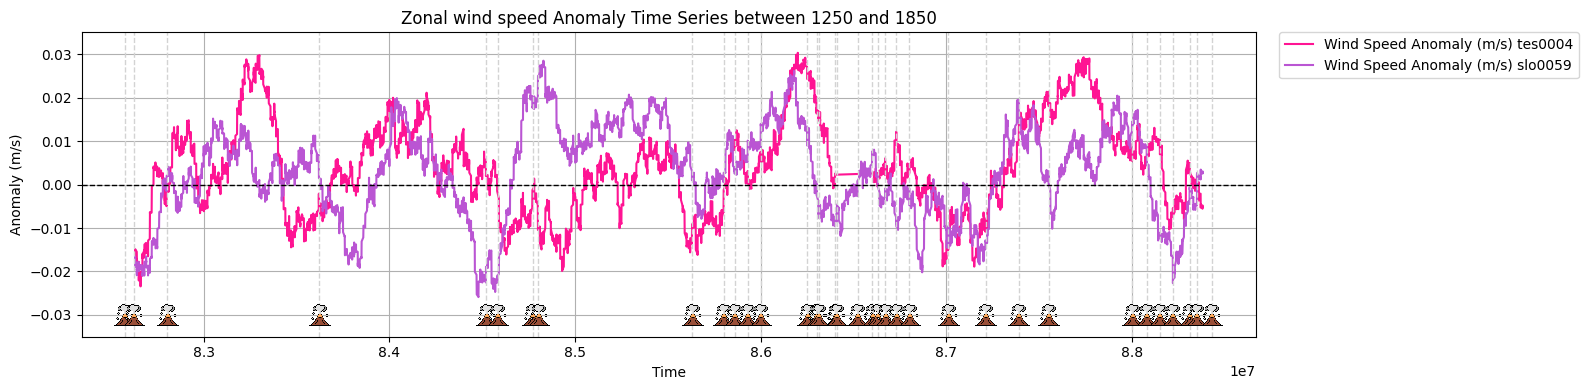

In [25]:
time_1250 = year_to_numeric(1250)
time_1850 = year_to_numeric(1850)

baseline_59 = ts_59.mean()
anomaly_59 = ts_59.sel(time=(absolute_u10_59.time >= time_1250) & (absolute_u10_59.time <= time_1850)) - baseline_59
anomaly_smoothed_59 = anomaly_59.rolling(time=300, center=True).mean()

baseline_04 = ts_04.mean()
anomaly_04 = ts_04.sel(time=(absolute_u10_04.time >= time_1250) & (absolute_u10_04.time <= time_1850)) - baseline_04
anomaly_smoothed_04 = anomaly_04.rolling(time=300, center=True).mean()

volcano = [1257, 1262, 1280, 1362, 1452, 1458, 1477, 1480, 1563, 1580, 1586, 1593, 
           1600, 1625, 1630, 1631, 1640, 1641, 1652, 1660, 1663, 1667, 1673, 1680, 
           1701, 1721, 1739, 1755, 1800, 1808, 1815, 1822, 1831, 1835, 1843]

volcano_img = mpimg.imread("volcano.png") 
volcano_icon = OffsetImage(volcano_img, zoom=0.03)

fig, ax = plt.subplots(figsize=(16, 4))
anomaly_smoothed_04.plot(label='Wind Speed Anomaly (m/s) tes0004', color='deeppink')
anomaly_smoothed_59.plot(label='Wind Speed Anomaly (m/s) slo0059', color='mediumorchid')

for vt in volcano:
    ax.axvline(x=year_to_numeric(vt), color='lightgray', linestyle='--', linewidth=1)
    ab = AnnotationBbox(volcano_icon, (year_to_numeric(vt), -0.03), frameon=False, box_alignment=(0.5, 0.5))
    ax.add_artist(ab)

ax.axhline(0, color='black', linestyle='--', linewidth=1)
ax.set_ylim(-0.035, 0.035)
ax.set_title('Zonal wind speed Anomaly Time Series between 1250 and 1850')
ax.set_ylabel('Anomaly (m/s)')
ax.set_xlabel('Time')
ax.grid(True)

ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
plt.tight_layout()
plt.show()

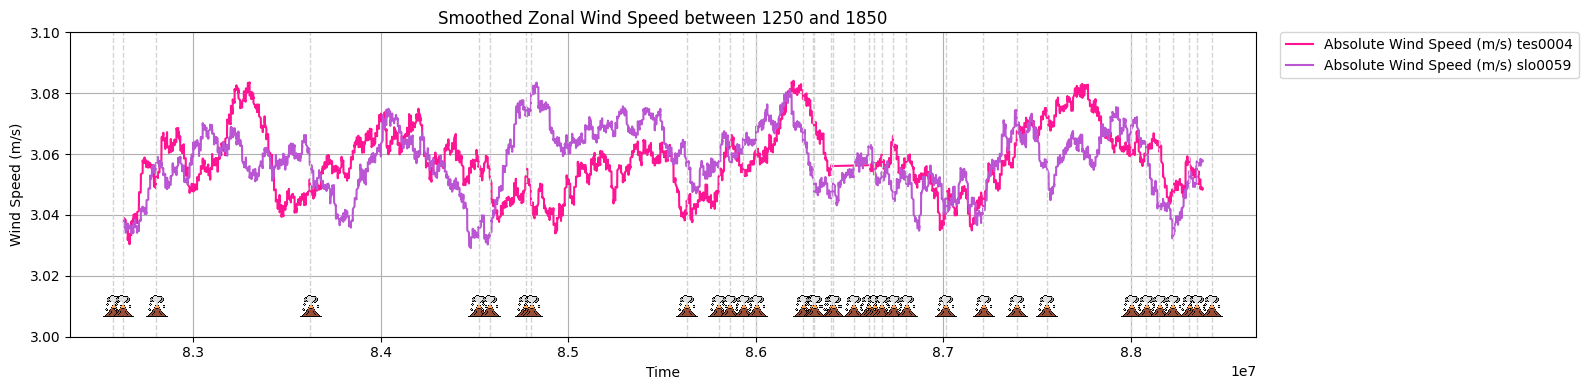

In [26]:
# Select time range for absolute values
ts_59 = ts_59.sel(time=slice(time_1250, time_1850))
ts_04 = ts_04.sel(time=slice(time_1250, time_1850))

# Apply smoothing
smooth_59 = ts_59.rolling(time=300, center=True).mean()
smooth_04 = ts_04.rolling(time=300, center=True).mean()

# Volcano years
volcano = [1257, 1262, 1280, 1362, 1452, 1458, 1477, 1480, 1563, 1580, 1586, 1593, 
           1600, 1625, 1630, 1631, 1640, 1641, 1652, 1660, 1663, 1667, 1673, 1680, 
           1701, 1721, 1739, 1755, 1800, 1808, 1815, 1822, 1831, 1835, 1843]

# Load volcano icon
volcano_img = mpimg.imread("volcano.png") 
volcano_icon = OffsetImage(volcano_img, zoom=0.03)

# Plotting
fig, ax = plt.subplots(figsize=(16, 4))

# Plot smoothed ABSOLUTE values
smooth_04.plot(ax=ax, label='Absolute Wind Speed (m/s) tes0004', color='deeppink')
smooth_59.plot(ax=ax, label='Absolute Wind Speed (m/s) slo0059', color='mediumorchid')

# Volcano lines and icons
for vt in volcano:
    x = year_to_numeric(vt)
    ax.axvline(x=x, color='lightgray', linestyle='--', linewidth=1)
    ab = AnnotationBbox(volcano_icon, (x, 3.01), frameon=False, box_alignment=(0.5, 0.5))
    ax.add_artist(ab)

ax.set_title('Smoothed Zonal Wind Speed between 1250 and 1850')
ax.set_ylim(3, 3.1)
ax.set_ylabel('Wind Speed (m/s)')
ax.set_xlabel('Time')
ax.grid(True)

# Legend outside
ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)

# Adjust layout
plt.tight_layout()
plt.show()


### MERIDIONAL

In [27]:
ds_v10_59 = xr.open_dataset('/nird/datalake/NS1004K/elihho/slo0059_echam6_BOT_mm_0_1850_var166.nc')
ds_v10_04 = xr.open_dataset('/nird/datalake/NS1004K/elihho/tes0004_echam6_BOT_mm_0_1850_var166.nc')
ds_v10_04

<xarray.Dataset> Size: 2GB
Dimensions:  (time: 21960, lon: 192, lat: 96)
Coordinates:
  * time     (time) float64 176kB 7.001e+07 7.001e+07 ... 8.85e+07 8.85e+07
  * lon      (lon) float64 2kB 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
  * lat      (lat) float64 768B 88.57 86.72 84.86 83.0 ... -84.86 -86.72 -88.57
Data variables:
    var166   (time, lat, lon) float32 2GB ...
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Mon Sep 07 15:34:44 2020: cdo cat tes0004__echam6_BOT_mm_70...
    institution:  Max-Planck-Institute for Meteorology
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

In [28]:
absolute_v10_59 = abs(ds_v10_59['var166'])
absolute_v10_04 = abs(ds_v10_04['var166'])
tsv_59 = absolute_v10_59.mean(dim=['lat', 'lon'])
tsv_04 = absolute_v10_04.mean(dim=['lat', 'lon'])

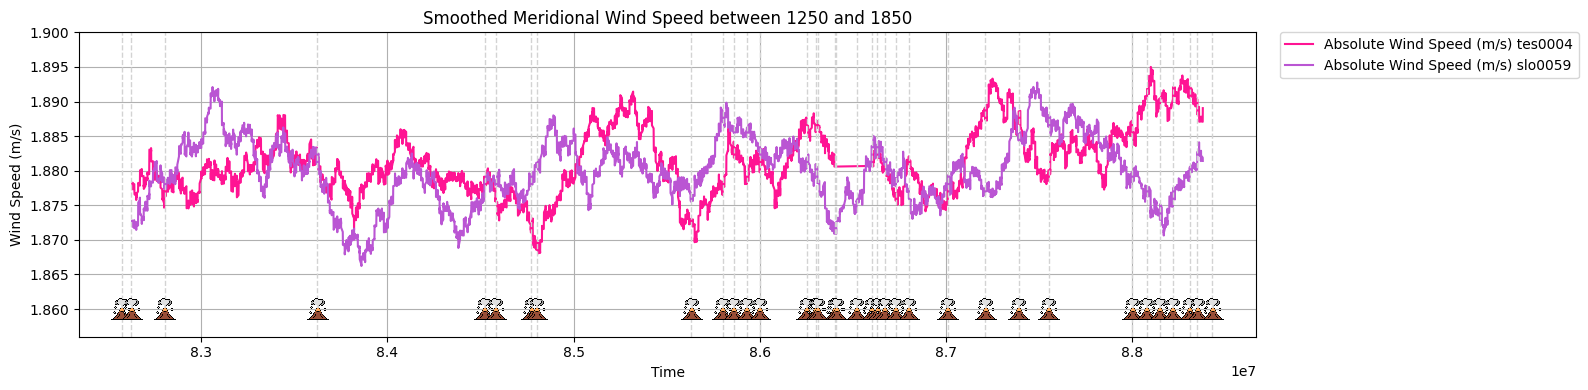

In [33]:
# Select time range for absolute values
tsv_59 = tsv_59.sel(time=slice(time_1250, time_1850))
tsv_04 = tsv_04.sel(time=slice(time_1250, time_1850))

# Apply smoothing
smoothv_59 = tsv_59.rolling(time=300, center=True).mean()
smoothv_04 = tsv_04.rolling(time=300, center=True).mean()

# Volcano years
volcano = [1257, 1262, 1280, 1362, 1452, 1458, 1477, 1480, 1563, 1580, 1586, 1593, 
           1600, 1625, 1630, 1631, 1640, 1641, 1652, 1660, 1663, 1667, 1673, 1680, 
           1701, 1721, 1739, 1755, 1800, 1808, 1815, 1822, 1831, 1835, 1843]

# Load volcano icon
volcano_img = mpimg.imread("volcano.png") 
volcano_icon = OffsetImage(volcano_img, zoom=0.03)

# Plotting
fig, ax = plt.subplots(figsize=(16, 4))

# Plot smoothed ABSOLUTE values
smoothv_04.plot(ax=ax, label='Absolute Wind Speed (m/s) tes0004', color='deeppink')
smoothv_59.plot(ax=ax, label='Absolute Wind Speed (m/s) slo0059', color='mediumorchid')

# Volcano lines and icons
for vt in volcano:
    x = year_to_numeric(vt)
    ax.axvline(x=x, color='lightgray', linestyle='--', linewidth=1)
    ab = AnnotationBbox(volcano_icon, (x, 1.86), frameon=False, box_alignment=(0.5, 0.5))
    ax.add_artist(ab)

ax.set_title('Smoothed Meridional Wind Speed between 1250 and 1850')
ax.set_ylim(1.856, 1.9)
ax.set_ylabel('Wind Speed (m/s)')
ax.set_xlabel('Time')
ax.grid(True)

# Legend outside
ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)

# Adjust layout
plt.tight_layout()
plt.show()

In [34]:
total_ws_59 = np.sqrt(ds_u10_59['var165']**2 + ds_v10_59['var166']**2) 
mean_ws_59 = total_ws_59.mean(dim = ['lat', 'lon'])

total_ws_04 = np.sqrt(ds_u10_04['var165']**2 + ds_v10_04['var166']**2) 
mean_ws_04 = total_ws_04.mean(dim = ['lat', 'lon'])

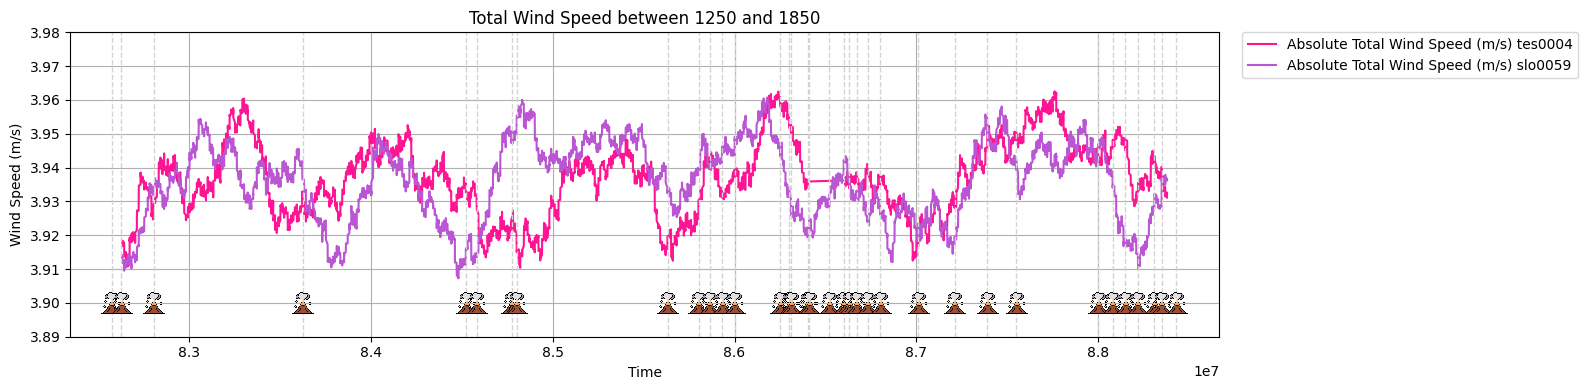

In [38]:
# Select time range for absolute values
mean_ws_59 = mean_ws_59.sel(time=slice(time_1250, time_1850))
mean_ws_04 = mean_ws_04.sel(time=slice(time_1250, time_1850))

# Apply smoothing
smoothv_59 = mean_ws_59.rolling(time=300, center=True).mean()
smoothv_04 = mean_ws_04.rolling(time=300, center=True).mean()

# Volcano years
volcano = [1257, 1262, 1280, 1362, 1452, 1458, 1477, 1480, 1563, 1580, 1586, 1593, 
           1600, 1625, 1630, 1631, 1640, 1641, 1652, 1660, 1663, 1667, 1673, 1680, 
           1701, 1721, 1739, 1755, 1800, 1808, 1815, 1822, 1831, 1835, 1843]

# Load volcano icon
volcano_img = mpimg.imread("volcano.png") 
volcano_icon = OffsetImage(volcano_img, zoom=0.03)

# Plotting
fig, ax = plt.subplots(figsize=(16, 4))

# Plot smoothed ABSOLUTE values
smoothv_04.plot(ax=ax, label='Absolute Total Wind Speed (m/s) tes0004', color='deeppink')
smoothv_59.plot(ax=ax, label='Absolute Total Wind Speed (m/s) slo0059', color='mediumorchid')

# Volcano lines and icons
for vt in volcano:
    x = year_to_numeric(vt)
    ax.axvline(x=x, color='lightgray', linestyle='--', linewidth=1)
    ab = AnnotationBbox(volcano_icon, (x, 3.9), frameon=False, box_alignment=(0.5, 0.5))
    ax.add_artist(ab)

ax.set_title('Total Wind Speed between 1250 and 1850')
ax.set_ylim(3.89, 3.98)
ax.set_ylabel('Wind Speed (m/s)')
ax.set_xlabel('Time')
ax.grid(True)

# Legend outside
ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)

# Adjust layout
plt.tight_layout()
plt.show()

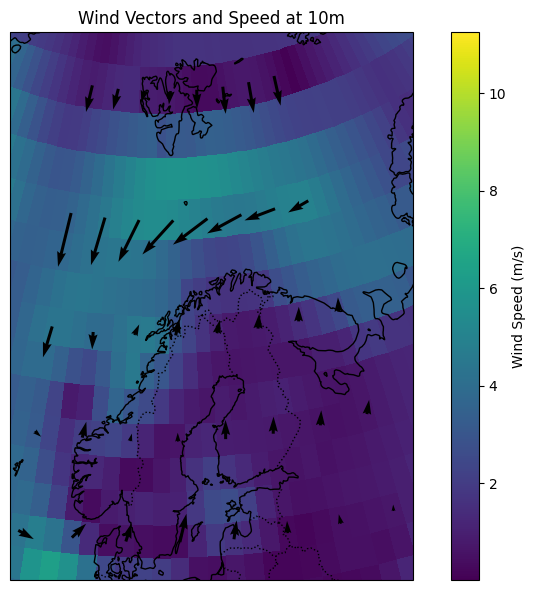

In [72]:
# 1. Subset your region FIRST
u_region = ds_u10_59['var165'].sel(
    lon=slice(0, 40),
    lat=slice(81, 54)  # descending if your latitudes go from N to S
).isel(time=1000)

v_region = ds_v10_59['var166'].sel(
    lon=slice(0, 40),
    lat=slice(81, 54)
).isel(time=1000)

# 2. Calculate wind speed
ws_region = np.sqrt(u_region**2 + v_region**2)

# 3. Downsample AFTER subsetting
step = 3
u_sub = u_region.isel(lat=slice(None, None, step), lon=slice(None, None, step))
v_sub = v_region.isel(lat=slice(None, None, step), lon=slice(None, None, step))
lat_sub = u_sub['lat'].values
lon_sub = u_sub['lon'].values
lon2d, lat2d = np.meshgrid(lon_sub, lat_sub)

# Set up map and plot
proj = ccrs.LambertConformal(central_longitude=15, central_latitude=60)

fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection=proj)
ax.set_extent([0, 40, 54, 81], crs=ccrs.PlateCarree())  # Adjust extent if needed

ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

speed_plot = ax.pcolormesh(u['lon'], u['lat'], ws,
                           cmap='viridis', shading='auto',
                           transform=ccrs.PlateCarree())

ax.quiver(lon2d, lat2d, u_sub.values, v_sub.values, color='black',
          transform=ccrs.PlateCarree())

# Colorbar and title
plt.colorbar(speed_plot, ax=ax, orientation='vertical', label='Wind Speed (m/s)')
plt.title('Wind Vectors and Speed at 10m')
plt.tight_layout()
plt.show()

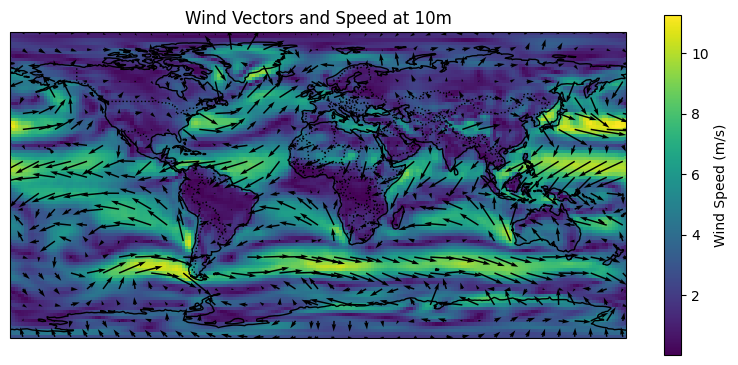

In [76]:
# 1. Extract one time step
u = ds_u10_59['var165'].isel(time=0)
v = ds_v10_59['var166'].isel(time=0)

# 2. Calculate total wind speed
ws = np.sqrt(u**2 + v**2)

# 3. Downsample (to reduce vector clutter)
step = 5  # Adjust based on how dense you want arrows
u_sub = u.isel(lat=slice(None, None, step), lon=slice(None, None, step))
v_sub = v.isel(lat=slice(None, None, step), lon=slice(None, None, step))
lats = u_sub['lat'].values
lons = u_sub['lon'].values
lon2d, lat2d = np.meshgrid(lons, lats)

# 4. Set up map
fig = plt.figure(figsize=(8, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# 5. Add map features
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# 6. Plot wind speed as color shading
speed_plot = ax.pcolormesh(u['lon'], u['lat'], ws,
                           cmap='viridis', shading='auto',
                           transform=ccrs.PlateCarree())

# 7. Plot wind vectors (quiver arrows)
ax.quiver(lon2d, lat2d, u_sub.values, v_sub.values,color='black',
          transform=ccrs.PlateCarree())

# 8. Colorbar and title
plt.colorbar(speed_plot, ax=ax, orientation='vertical', shrink=0.35, label='Wind Speed (m/s)')
plt.title('Wind Vectors and Speed at 10m')
plt.tight_layout()
plt.show()
